In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns; sns.set()

In [71]:
""" 
Written by Dale Erikson 
for BIOSC1542 Computational Genomics 
for Group Project RNA Seq Analysis of X. lae Genome 
"""

' \nWritten by Dale Erikson \nfor BIOSC1542 Computational Genomics \nfor Group Project RNA Seq Analysis of X. lae Genome \n'

In [2]:
late = pd.read_csv('xlaeRNASeqLateMatchLSf1-8.txt', delimiter = '\t', header=None)
late

,0,1,2,3,4,5,6,7
0,gene7104,a2m.L,4377,0,gene50021,a2m.S,4931,11971
1,gene13311,aadat.L,1856,0,gene17129,aadat.S,3629,42
2,gene28709,aaed1.L,627,0,gene16356,aaed1.S,2016,26
3,gene1693,aagab.L,1969,71,gene11287,aagab.S,1801,63
4,gene3807,aamp.L,3369,466,gene8875,aamp.S,4411,344
...,...,...,...,...,...,...,...,...
5498,gene10092,zswim3.L,3153,274,gene18301,zswim3.S,3434,132
5499,gene5666,zufsp.L,508,0,gene11973,zufsp.S,3769,70
5500,gene18498,zw10.L,3024,74,gene1215,zw10.S,2821,119
5501,gene18154,zyg11b.L,5630,89,gene19986,zyg11b.S,5803,216


In [3]:
LreadSum = np.sum(late[3])
LreadSum
LavgLen = np.sum(late[2]) / 5503
LavgLen

3653.9065964019624

In [4]:
SreadSum = np.sum(late[7])
SreadSum
SavgLen = np.sum(late[6]) / 5503
SavgLen

3536.53897873887

In [5]:
early = pd.read_csv('xlaeRNASeqEarlyMatchLSf1-8.txt', delimiter = '\t', header=None)
early

,0,1,2,3,4,5,6,7
0,gene7104,a2m.L,4377,0,gene50021,a2m.S,4931,0
1,gene13311,aadat.L,1856,0,gene17129,aadat.S,3629,152
2,gene28709,aaed1.L,627,0,gene16356,aaed1.S,2016,12
3,gene1693,aagab.L,1969,208,gene11287,aagab.S,1801,305
4,gene3807,aamp.L,3369,227,gene8875,aamp.S,4411,388
...,...,...,...,...,...,...,...,...
5498,gene10092,zswim3.L,3153,594,gene18301,zswim3.S,3434,127
5499,gene5666,zufsp.L,508,0,gene11973,zufsp.S,3769,391
5500,gene18498,zw10.L,3024,48,gene1215,zw10.S,2821,126
5501,gene18154,zyg11b.L,5630,143,gene19986,zyg11b.S,5803,170


In [6]:
# RPK = read / length * 10**3 
# TPM = (CDS read count * mean read length * 106) / (CDS length * total transcript count) 
late['RPK-L'] = (late[3] * 10**3) / (late[2]) 
late['RPK-S'] = (late[7] * 10**3) / (late[6])

In [7]:
late

,0,1,2,3,4,5,6,7,RPK-L,RPK-S
0,gene7104,a2m.L,4377,0,gene50021,a2m.S,4931,11971,0.000000,2427.702292
1,gene13311,aadat.L,1856,0,gene17129,aadat.S,3629,42,0.000000,11.573436
2,gene28709,aaed1.L,627,0,gene16356,aaed1.S,2016,26,0.000000,12.896825
3,gene1693,aagab.L,1969,71,gene11287,aagab.S,1801,63,36.058913,34.980566
4,gene3807,aamp.L,3369,466,gene8875,aamp.S,4411,344,138.319976,77.986851
...,...,...,...,...,...,...,...,...,...,...
5498,gene10092,zswim3.L,3153,274,gene18301,zswim3.S,3434,132,86.901364,38.439138
5499,gene5666,zufsp.L,508,0,gene11973,zufsp.S,3769,70,0.000000,18.572566
5500,gene18498,zw10.L,3024,74,gene1215,zw10.S,2821,119,24.470899,42.183623
5501,gene18154,zyg11b.L,5630,89,gene19986,zyg11b.S,5803,216,15.808171,37.222126


In [8]:
RPKSumL = np.sum(late['RPK-L'])
RPKSumL

1193942.615379171

In [9]:
RPKSumS = np.sum(late['RPK-S'])
RPKSumS

1043555.5460836894

In [10]:
# TPM = RPK / sum(RPK) * 10**6
late['TPM-L'] = late['RPK-L'] / RPKSumL * 10**6 
late['TPM-S'] = late['RPK-S'] / RPKSumS * 10**6 

In [11]:
late

,0,1,2,3,4,5,6,7,RPK-L,RPK-S,TPM-L,TPM-S
0,gene7104,a2m.L,4377,0,gene50021,a2m.S,4931,11971,0.000000,2427.702292,0.000000,2326.375726
1,gene13311,aadat.L,1856,0,gene17129,aadat.S,3629,42,0.000000,11.573436,0.000000,11.090388
2,gene28709,aaed1.L,627,0,gene16356,aaed1.S,2016,26,0.000000,12.896825,0.000000,12.358542
3,gene1693,aagab.L,1969,71,gene11287,aagab.S,1801,63,36.058913,34.980566,30.201546,33.520560
4,gene3807,aamp.L,3369,466,gene8875,aamp.S,4411,344,138.319976,77.986851,115.851444,74.731864
...,...,...,...,...,...,...,...,...,...,...,...,...
5498,gene10092,zswim3.L,3153,274,gene18301,zswim3.S,3434,132,86.901364,38.439138,72.785210,36.834779
5499,gene5666,zufsp.L,508,0,gene11973,zufsp.S,3769,70,0.000000,18.572566,0.000000,17.797391
5500,gene18498,zw10.L,3024,74,gene1215,zw10.S,2821,119,24.470899,42.183623,20.495876,40.422978
5501,gene18154,zyg11b.L,5630,89,gene19986,zyg11b.S,5803,216,15.808171,37.222126,13.240310,35.668563


In [12]:
np.sum(late['TPM-L'])

1000000.0

In [13]:
np.sum(late['TPM-S'])

999999.9999999999

In [14]:
late['TPM-L-log2'] = np.log2(late['TPM-L'] + 0.5)
late['TPM-S-log2'] = np.log2(late['TPM-S'] + 0.5)
late

,0,1,2,3,4,5,6,7,RPK-L,RPK-S,TPM-L,TPM-S,TPM-L-log2,TPM-S-log2
0,gene7104,a2m.L,4377,0,gene50021,a2m.S,4931,11971,0.000000,2427.702292,0.000000,2326.375726,-1.000000,11.184178
1,gene13311,aadat.L,1856,0,gene17129,aadat.S,3629,42,0.000000,11.573436,0.000000,11.090388,-1.000000,3.534857
2,gene28709,aaed1.L,627,0,gene16356,aaed1.S,2016,26,0.000000,12.896825,0.000000,12.358542,-1.000000,3.684655
3,gene1693,aagab.L,1969,71,gene11287,aagab.S,1801,63,36.058913,34.980566,30.201546,33.520560,4.940239,5.088335
4,gene3807,aamp.L,3369,466,gene8875,aamp.S,4411,344,138.319976,77.986851,115.851444,74.731864,6.862345,6.233272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5498,gene10092,zswim3.L,3153,274,gene18301,zswim3.S,3434,132,86.901364,38.439138,72.785210,36.834779,6.195450,5.222448
5499,gene5666,zufsp.L,508,0,gene11973,zufsp.S,3769,70,0.000000,18.572566,0.000000,17.797391,-1.000000,4.193566
5500,gene18498,zw10.L,3024,74,gene1215,zw10.S,2821,119,24.470899,42.183623,20.495876,40.422978,4.392034,5.354839
5501,gene18154,zyg11b.L,5630,89,gene19986,zyg11b.S,5803,216,15.808171,37.222126,13.240310,35.668563,3.780343,5.176664


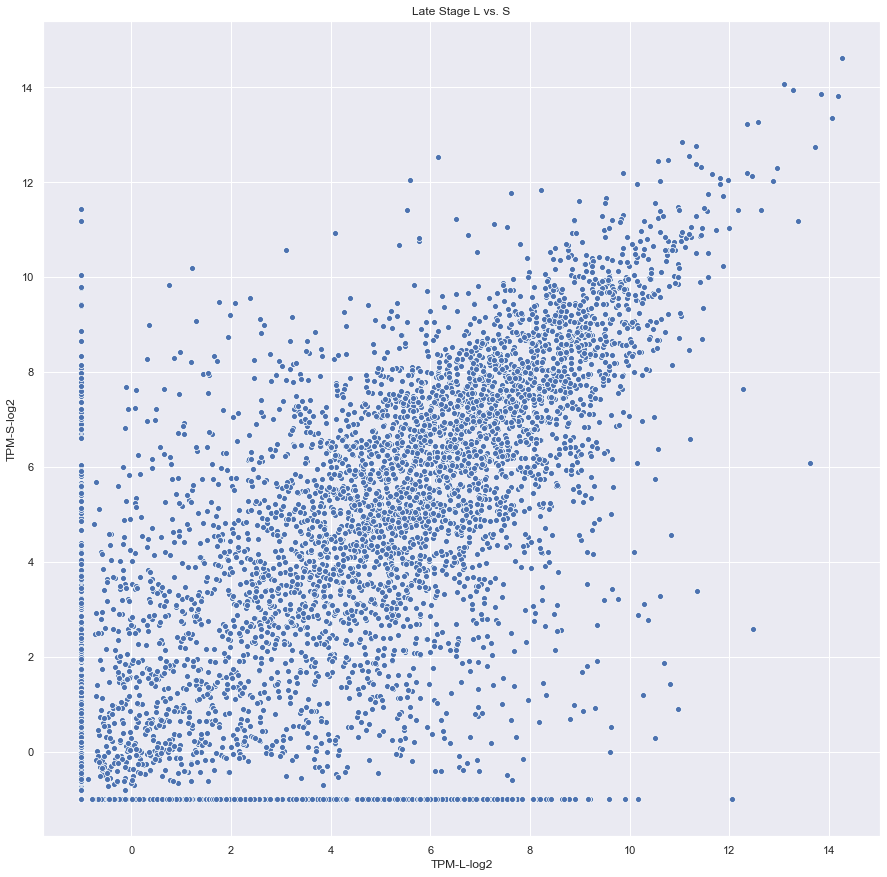

In [15]:
from matplotlib import pyplot
pyplot.figure(figsize=(15, 15)) 
ax = sns.scatterplot(x="TPM-L-log2", y="TPM-S-log2", data=late).set_title("Late Stage L vs. S")

In [16]:
early['RPK-L'] = (early[3] * 10**3) / (early[2]) 
early['RPK-S'] = (early[7] * 10**3) / (early[6])
RPKSumLEarly = np.sum(early['RPK-L'])
RPKSumSEarly = np.sum(early['RPK-S'])
early['TPM-L'] = early['RPK-L'] / RPKSumLEarly * 10**6 
early['TPM-S'] = early['RPK-S'] / RPKSumSEarly * 10**6 

In [17]:
early

,0,1,2,3,4,5,6,7,RPK-L,RPK-S,TPM-L,TPM-S
0,gene7104,a2m.L,4377,0,gene50021,a2m.S,4931,0,0.000000,0.000000,0.000000,0.000000
1,gene13311,aadat.L,1856,0,gene17129,aadat.S,3629,152,0.000000,41.884817,0.000000,46.723795
2,gene28709,aaed1.L,627,0,gene16356,aaed1.S,2016,12,0.000000,5.952381,0.000000,6.640063
3,gene1693,aagab.L,1969,208,gene11287,aagab.S,1801,305,105.637379,169.350361,111.643936,188.915513
4,gene3807,aamp.L,3369,227,gene8875,aamp.S,4411,388,67.379044,87.961913,71.210226,98.124207
...,...,...,...,...,...,...,...,...,...,...,...,...
5498,gene10092,zswim3.L,3153,594,gene18301,zswim3.S,3434,127,188.392008,36.983110,199.104004,41.255792
5499,gene5666,zufsp.L,508,0,gene11973,zufsp.S,3769,391,0.000000,103.741045,0.000000,115.726312
5500,gene18498,zw10.L,3024,48,gene1215,zw10.S,2821,126,15.873016,44.665012,16.775558,49.825189
5501,gene18154,zyg11b.L,5630,143,gene19986,zyg11b.S,5803,170,25.399645,29.295192,26.843872,32.679684


In [18]:
np.sum(early['TPM-L'])

1000000.0

In [19]:
np.sum(early['TPM-S'])

1000000.0

In [20]:
early['TPM-L-log2'] = np.log2(early['TPM-L'] + 0.5)
early['TPM-S-log2'] = np.log2(early['TPM-S'] + 0.5)

In [21]:
early

,0,1,2,3,4,5,6,7,RPK-L,RPK-S,TPM-L,TPM-S,TPM-L-log2,TPM-S-log2
0,gene7104,a2m.L,4377,0,gene50021,a2m.S,4931,0,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
1,gene13311,aadat.L,1856,0,gene17129,aadat.S,3629,152,0.000000,41.884817,0.000000,46.723795,-1.000000,5.561442
2,gene28709,aaed1.L,627,0,gene16356,aaed1.S,2016,12,0.000000,5.952381,0.000000,6.640063,-1.000000,2.835937
3,gene1693,aagab.L,1969,208,gene11287,aagab.S,1801,305,105.637379,169.350361,111.643936,188.915513,6.809208,7.565411
4,gene3807,aamp.L,3369,227,gene8875,aamp.S,4411,388,67.379044,87.961913,71.210226,98.124207,6.164107,6.623870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5498,gene10092,zswim3.L,3153,594,gene18301,zswim3.S,3434,127,188.392008,36.983110,199.104004,41.255792,7.640997,5.383904
5499,gene5666,zufsp.L,508,0,gene11973,zufsp.S,3769,391,0.000000,103.741045,0.000000,115.726312,-1.000000,6.860793
5500,gene18498,zw10.L,3024,48,gene1215,zw10.S,2821,126,15.873016,44.665012,16.775558,49.825189,4.110660,5.653209
5501,gene18154,zyg11b.L,5630,143,gene19986,zyg11b.S,5803,170,25.399645,29.295192,26.843872,32.679684,4.773146,5.052228


In [22]:
early['earlySig'] = early['set_of_numbers'].apply(lambda x: 'True' if x <= 4 else 'False')

KeyError: 'set_of_numbers'

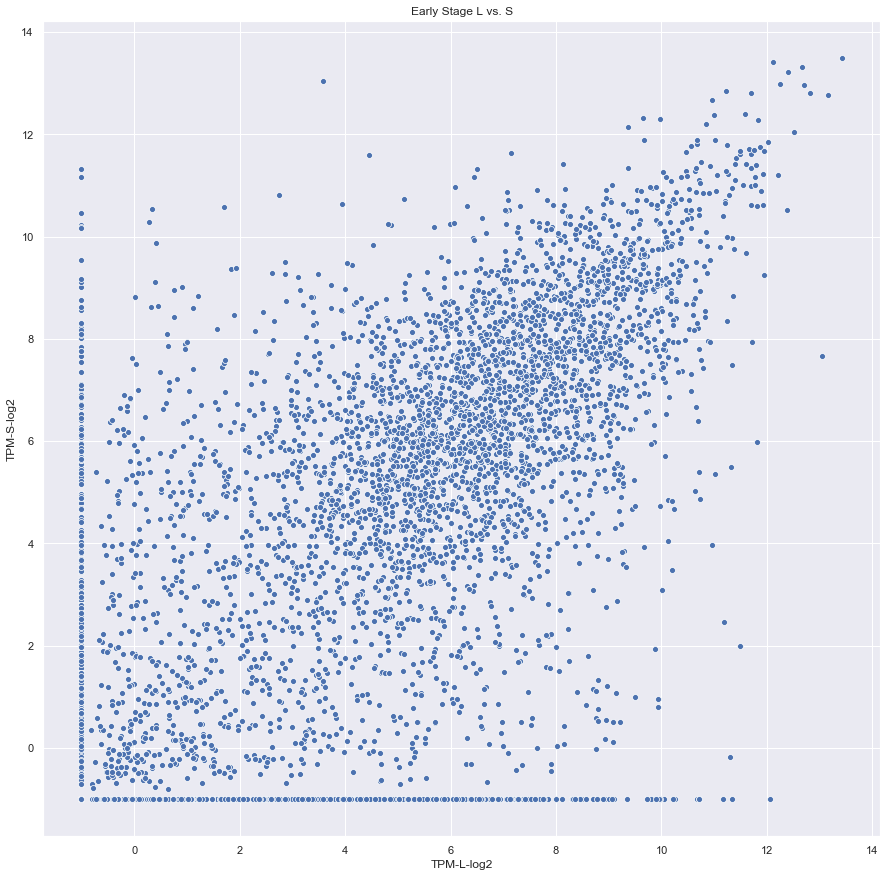

In [23]:
from matplotlib import pyplot
pyplot.figure(figsize=(15, 15)) 
ax = sns.scatterplot(x="TPM-L-log2", y="TPM-S-log2", data=early).set_title("Early Stage L vs. S")

In [59]:
# Dale's Task Chart 3

""" 
A biplot showing L clearance compared to S clearance, highlighting genes with differential L vs
S clearance. Each point in the graph represents one gene, plotting log2 (late/early) TPM for the
L copy on the x axis and log2 (late/early) TPM for the S copy on the y axis
"""
early['early?'] = True

In [24]:
early

,0,1,2,3,4,5,6,7,RPK-L,RPK-S,TPM-L,TPM-S,TPM-L-log2,TPM-S-log2
0,gene7104,a2m.L,4377,0,gene50021,a2m.S,4931,0,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
1,gene13311,aadat.L,1856,0,gene17129,aadat.S,3629,152,0.000000,41.884817,0.000000,46.723795,-1.000000,5.561442
2,gene28709,aaed1.L,627,0,gene16356,aaed1.S,2016,12,0.000000,5.952381,0.000000,6.640063,-1.000000,2.835937
3,gene1693,aagab.L,1969,208,gene11287,aagab.S,1801,305,105.637379,169.350361,111.643936,188.915513,6.809208,7.565411
4,gene3807,aamp.L,3369,227,gene8875,aamp.S,4411,388,67.379044,87.961913,71.210226,98.124207,6.164107,6.623870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5498,gene10092,zswim3.L,3153,594,gene18301,zswim3.S,3434,127,188.392008,36.983110,199.104004,41.255792,7.640997,5.383904
5499,gene5666,zufsp.L,508,0,gene11973,zufsp.S,3769,391,0.000000,103.741045,0.000000,115.726312,-1.000000,6.860793
5500,gene18498,zw10.L,3024,48,gene1215,zw10.S,2821,126,15.873016,44.665012,16.775558,49.825189,4.110660,5.653209
5501,gene18154,zyg11b.L,5630,143,gene19986,zyg11b.S,5803,170,25.399645,29.295192,26.843872,32.679684,4.773146,5.052228


In [25]:
earlyClean = early[[0,1,4,5,'TPM-L','TPM-S']]
lateClean = late[[0,1,4,5,'TPM-L','TPM-S']]

In [26]:
earlyClean = earlyClean.rename(columns={0: "earlyL", 1: "earlyLName", 4:"earlyS",5:"earlySName","TPM-L":"EarlyTPM-L","TPM-S":"EarlyTPM-S"})

In [27]:
lateClean = lateClean.rename(columns={0: "lateL", 1: "lateLName", 4:"lateS",5:"lateSName","TPM-L":"lateTPM-L","TPM-S":"lateTPM-S"})

In [29]:
earlyAndLateTPMs = pd.concat([earlyClean,lateClean],axis=1)

In [42]:
earlyAndLateTPMs.to_csv('AfricanFrogRNASeqEarlyAndLateTPM.tsv',sep='\t',index=False)

In [30]:
# A biplot showing L clearance compared to S clearance, highlighting genes with differential L vs
# S clearance.
# plotting log2 (late/early) TPM for the L copy on the x axis and log2 (late/early) TPM for the S copy on the y axis
earlyAndLateTPMs

,earlyL,earlyLName,earlyS,earlySName,EarlyTPM-L,EarlyTPM-S,lateL,lateLName,lateS,lateSName,lateTPM-L,lateTPM-S
0,gene7104,a2m.L,gene50021,a2m.S,0.000000,0.000000,gene7104,a2m.L,gene50021,a2m.S,0.000000,2326.375726
1,gene13311,aadat.L,gene17129,aadat.S,0.000000,46.723795,gene13311,aadat.L,gene17129,aadat.S,0.000000,11.090388
2,gene28709,aaed1.L,gene16356,aaed1.S,0.000000,6.640063,gene28709,aaed1.L,gene16356,aaed1.S,0.000000,12.358542
3,gene1693,aagab.L,gene11287,aagab.S,111.643936,188.915513,gene1693,aagab.L,gene11287,aagab.S,30.201546,33.520560
4,gene3807,aamp.L,gene8875,aamp.S,71.210226,98.124207,gene3807,aamp.L,gene8875,aamp.S,115.851444,74.731864
...,...,...,...,...,...,...,...,...,...,...,...,...
5498,gene10092,zswim3.L,gene18301,zswim3.S,199.104004,41.255792,gene10092,zswim3.L,gene18301,zswim3.S,72.785210,36.834779
5499,gene5666,zufsp.L,gene11973,zufsp.S,0.000000,115.726312,gene5666,zufsp.L,gene11973,zufsp.S,0.000000,17.797391
5500,gene18498,zw10.L,gene1215,zw10.S,16.775558,49.825189,gene18498,zw10.L,gene1215,zw10.S,20.495876,40.422978
5501,gene18154,zyg11b.L,gene19986,zyg11b.S,26.843872,32.679684,gene18154,zyg11b.L,gene19986,zyg11b.S,13.240310,35.668563


In [107]:
earlyAndLateTPMs['LClear'] = np.log2(earlyAndLateTPMs['lateTPM-L'] / (earlyAndLateTPMs['EarlyTPM-L'] + .05))

In [108]:
earlyAndLateTPMs

,earlyL,earlyLName,earlyS,earlySName,EarlyTPM-L,EarlyTPM-S,lateL,lateLName,lateS,lateSName,lateTPM-L,lateTPM-S,LClear,SClear,SSig,LSig,Sig,Differentially Cleared
0,gene7104,a2m.L,gene50021,a2m.S,0.000000,0.000000,gene7104,a2m.L,gene50021,a2m.S,0.000000,2326.375726,-inf,12.046365,True,False,True,True
1,gene13311,aadat.L,gene17129,aadat.S,0.000000,46.723795,gene13311,aadat.L,gene17129,aadat.S,0.000000,11.090388,-inf,-2.091731,False,False,False,True
2,gene28709,aaed1.L,gene16356,aaed1.S,0.000000,6.640063,gene28709,aaed1.L,gene16356,aaed1.S,0.000000,12.358542,-inf,0.781432,False,False,False,True
3,gene1693,aagab.L,gene11287,aagab.S,111.643936,188.915513,gene1693,aagab.L,gene11287,aagab.S,30.201546,33.520560,-1.886857,-2.498817,False,False,False,False
4,gene3807,aamp.L,gene8875,aamp.S,71.210226,98.124207,gene3807,aamp.L,gene8875,aamp.S,115.851444,74.731864,0.701107,-0.400950,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5498,gene10092,zswim3.L,gene18301,zswim3.S,199.104004,41.255792,gene10092,zswim3.L,gene18301,zswim3.S,72.785210,36.834779,-1.452167,-0.182634,False,False,False,False
5499,gene5666,zufsp.L,gene11973,zufsp.S,0.000000,115.726312,gene5666,zufsp.L,gene11973,zufsp.S,0.000000,17.797391,-inf,-2.707820,False,False,False,True
5500,gene18498,zw10.L,gene1215,zw10.S,16.775558,49.825189,gene18498,zw10.L,gene1215,zw10.S,20.495876,40.422978,0.284679,-0.317538,False,False,False,False
5501,gene18154,zyg11b.L,gene19986,zyg11b.S,26.843872,32.679684,gene18154,zyg11b.L,gene19986,zyg11b.S,13.240310,35.668563,-1.022341,0.102181,False,False,False,False


In [109]:
earlyAndLateTPMs['SClear'] = np.log2(earlyAndLateTPMs['lateTPM-S'] / (earlyAndLateTPMs['EarlyTPM-S'] + .05))
earlyAndLateTPMs

,earlyL,earlyLName,earlyS,earlySName,EarlyTPM-L,EarlyTPM-S,lateL,lateLName,lateS,lateSName,lateTPM-L,lateTPM-S,LClear,SClear,SSig,LSig,Sig,Differentially Cleared
0,gene7104,a2m.L,gene50021,a2m.S,0.000000,0.000000,gene7104,a2m.L,gene50021,a2m.S,0.000000,2326.375726,-inf,15.505797,True,False,True,True
1,gene13311,aadat.L,gene17129,aadat.S,0.000000,46.723795,gene13311,aadat.L,gene17129,aadat.S,0.000000,11.090388,-inf,-2.076391,False,False,False,True
2,gene28709,aaed1.L,gene16356,aaed1.S,0.000000,6.640063,gene28709,aaed1.L,gene16356,aaed1.S,0.000000,12.358542,-inf,0.885417,False,False,False,True
3,gene1693,aagab.L,gene11287,aagab.S,111.643936,188.915513,gene1693,aagab.L,gene11287,aagab.S,30.201546,33.520560,-1.886857,-2.495005,False,False,False,False
4,gene3807,aamp.L,gene8875,aamp.S,71.210226,98.124207,gene3807,aamp.L,gene8875,aamp.S,115.851444,74.731864,0.701107,-0.393621,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5498,gene10092,zswim3.L,gene18301,zswim3.S,199.104004,41.255792,gene10092,zswim3.L,gene18301,zswim3.S,72.785210,36.834779,-1.452167,-0.165275,False,False,False,False
5499,gene5666,zufsp.L,gene11973,zufsp.S,0.000000,115.726312,gene5666,zufsp.L,gene11973,zufsp.S,0.000000,17.797391,-inf,-2.701602,False,False,False,True
5500,gene18498,zw10.L,gene1215,zw10.S,16.775558,49.825189,gene18498,zw10.L,gene1215,zw10.S,20.495876,40.422978,0.284679,-0.303147,False,False,False,False
5501,gene18154,zyg11b.L,gene19986,zyg11b.S,26.843872,32.679684,gene18154,zyg11b.L,gene19986,zyg11b.S,13.240310,35.668563,-1.022341,0.124053,False,False,False,False


In [110]:
earlyAndLateTPMs['Differentially Cleared'] = np.absolute(np.subtract(earlyAndLateTPMs["LClear"],earlyAndLateTPMs["SClear"])) > 2 

In [111]:
earlyAndLateTPMs

,earlyL,earlyLName,earlyS,earlySName,EarlyTPM-L,EarlyTPM-S,lateL,lateLName,lateS,lateSName,lateTPM-L,lateTPM-S,LClear,SClear,SSig,LSig,Sig,Differentially Cleared
0,gene7104,a2m.L,gene50021,a2m.S,0.000000,0.000000,gene7104,a2m.L,gene50021,a2m.S,0.000000,2326.375726,-inf,15.505797,True,False,True,True
1,gene13311,aadat.L,gene17129,aadat.S,0.000000,46.723795,gene13311,aadat.L,gene17129,aadat.S,0.000000,11.090388,-inf,-2.076391,False,False,False,True
2,gene28709,aaed1.L,gene16356,aaed1.S,0.000000,6.640063,gene28709,aaed1.L,gene16356,aaed1.S,0.000000,12.358542,-inf,0.885417,False,False,False,True
3,gene1693,aagab.L,gene11287,aagab.S,111.643936,188.915513,gene1693,aagab.L,gene11287,aagab.S,30.201546,33.520560,-1.886857,-2.495005,False,False,False,False
4,gene3807,aamp.L,gene8875,aamp.S,71.210226,98.124207,gene3807,aamp.L,gene8875,aamp.S,115.851444,74.731864,0.701107,-0.393621,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5498,gene10092,zswim3.L,gene18301,zswim3.S,199.104004,41.255792,gene10092,zswim3.L,gene18301,zswim3.S,72.785210,36.834779,-1.452167,-0.165275,False,False,False,False
5499,gene5666,zufsp.L,gene11973,zufsp.S,0.000000,115.726312,gene5666,zufsp.L,gene11973,zufsp.S,0.000000,17.797391,-inf,-2.701602,False,False,False,True
5500,gene18498,zw10.L,gene1215,zw10.S,16.775558,49.825189,gene18498,zw10.L,gene1215,zw10.S,20.495876,40.422978,0.284679,-0.303147,False,False,False,False
5501,gene18154,zyg11b.L,gene19986,zyg11b.S,26.843872,32.679684,gene18154,zyg11b.L,gene19986,zyg11b.S,13.240310,35.668563,-1.022341,0.124053,False,False,False,False


In [104]:
geneNames = pd.read_csv('geneNameAndID.txt', delimiter = " ", header=None)
geneNames

,0,1
0,gene1,slc26a4-b.L
1,gene1,slc26a4.L
2,gene100,dhx16.S
3,gene1000,ufm1.L
4,gene10002,mmel1.L
...,...,...
20615,gene9993,atoh8.S
20616,gene9994,fam198b.S
20617,gene9995,golgb1.S
20618,gene9997,prkd3.L


In [105]:
earlyAndLateTPMs.to_csv('AfricanFrogRNASeqEarlyAndLateTPM.tsv',sep='\t',index=False)

[Text(0, 0.5, 'S Copy log2(late/early) TPM'),
 Text(0.5, 0, 'L Copy log2(late/early) TPM')]

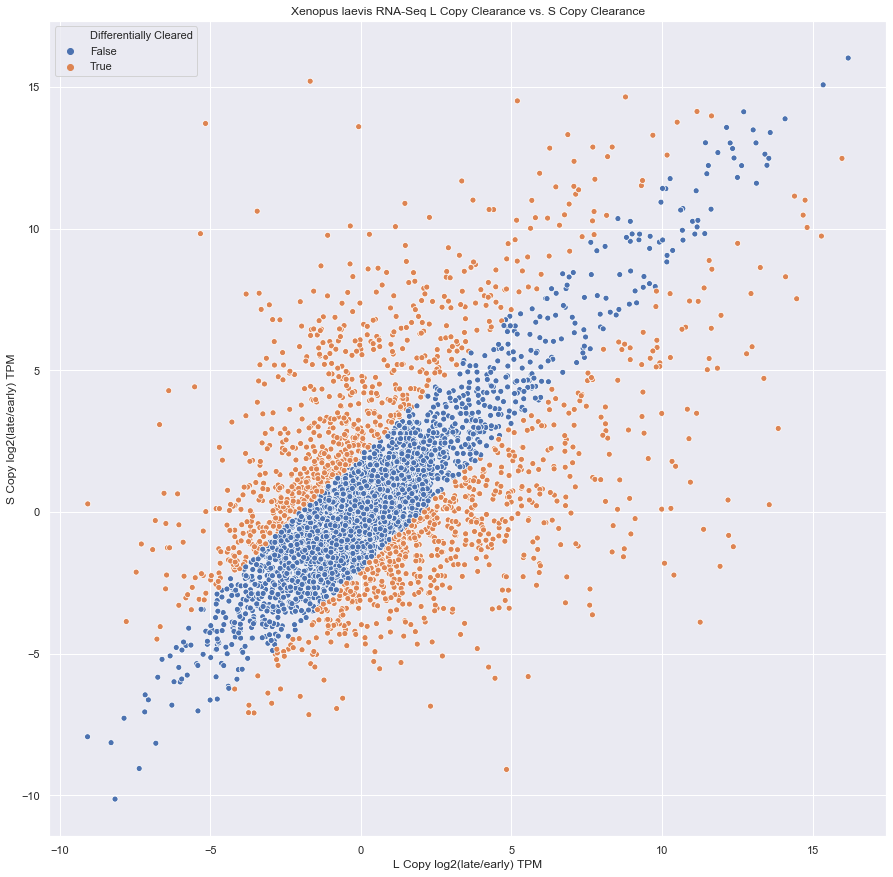

In [112]:
pyplot.figure(figsize=(15, 15)) 
ax = sns.scatterplot(x="LClear", y="SClear", data=earlyAndLateTPMs, hue="Differentially Cleared")
ax.set_title("Xenopus laevis RNA-Seq L Copy Clearance vs. S Copy Clearance")
ax.set(xlabel='L Copy log2(late/early) TPM', ylabel='S Copy log2(late/early) TPM')

In [152]:
sigGenes.to_csv("sigGenes.txt",sep='\t',index=False)

Text(0.5, 1.0, 'Early L log2TPM vs Late L log2TPM')

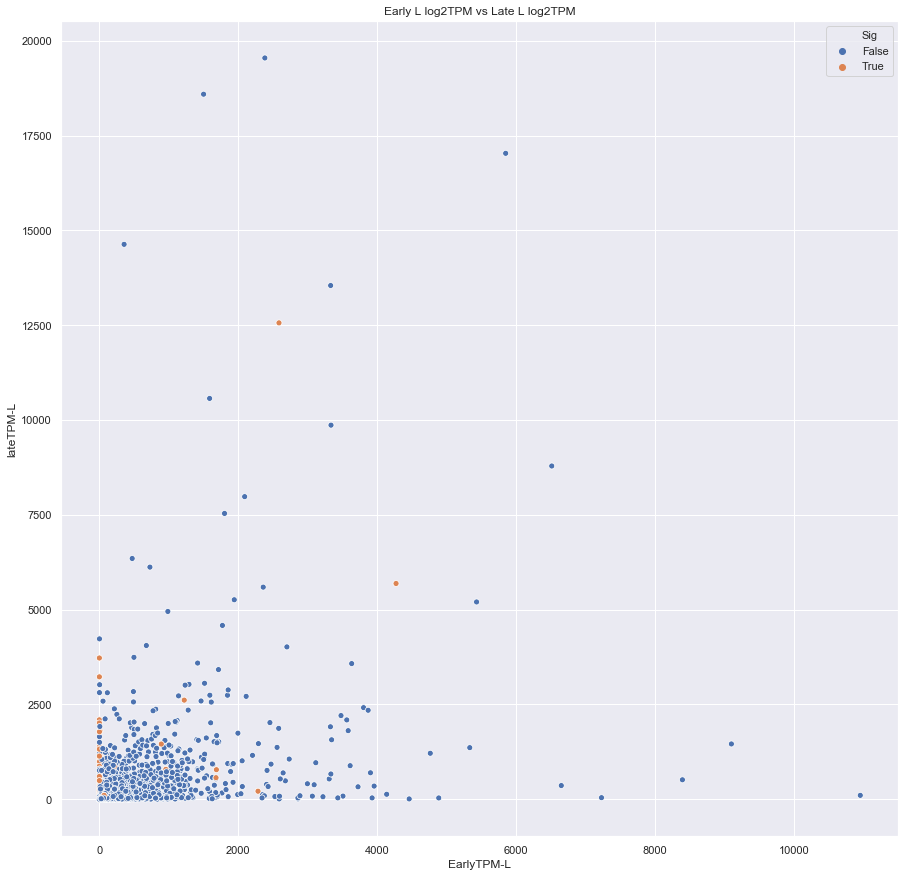

In [53]:
pyplot.figure(figsize=(15, 15)) 
ax = sns.scatterplot(x=("EarlyTPM-L") , y="lateTPM-L", hue="Sig",data=earlyAndLateTPMs)
ax.set_title("Early L log2TPM vs Late L log2TPM")